# Interaction of student learning attitudes and teacher support on their math performances measured by math score and performance by countries

#### By Ana Sudame

# Investigation Overview

In this investigation, I want to look at interaction between student attitudes towards math learning and teacher support.
Also look at their math scores based on if they possess access to internet; further exploring this trend across the countries.

### Dataset overview
The PISA data consists of a survey of students' skills and knowledge as they approach the end of compulsory education. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. This dataset consists of over 2 million rows and 636 columns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [2]:
#Load the larger data in chunks 
df_chunk= pd.read_csv("pisa2012.csv", encoding= 'latin-1',error_bad_lines=False, index_col=False, dtype='unicode', 
                iterator= True,chunksize= 30000)

In [3]:
#Getting the column names from the pisa dict
pisa_dict = pd.read_csv('pisadict2012.csv', encoding='latin-1')
new_pisa_names = ['']
for row in pisa_dict['x']:
    new_pisa_names.append(row)


In [4]:
#Collect the data for few columns based on the features needed
attrib_student= ['Country code 3-character','OECD country','Student ID','Gender','Truancy - Skip whole school day',
             'Mother Current Job Status','Father Current Job Status','Possessions - Internet',
              'Math Interest - Enjoy Maths','Math Interest - Look Forward to Lessons',
             'Instrumental Motivation - Important for Future Study','Instrumental Motivation - Helps to Get a Job',
              'Math Anxiety - Worry That It Will Be Difficult',
             'Math Self-Concept - Learn Quickly',
                 'Perceived Control - Doing Well is Completely Up to Me',
                 'Perceived Control - Perform Poorly Regardless',
              'Attributions to Failure - Material Too Hard', 
                 'Attributions to Failure - Teacher Didnt Get Students Interested',              
              'Math Work Ethic - Homework Completed in Time',
                 'Math Work Ethic - Prepared for Exams',
              'Math Work Ethic - Pay Attention in Classes',
              'Math Behaviour - Study More Than 2 Extra Hours a Day',
              'Math Behaviour - <Extracurricular> Activity',
                 'Math Behaviour - Help Friends with Maths',
              'Out of school lessons - <maths>',
              'No of <class period> p/wk - <Maths>',
                 'Min in <class period> - <Maths>',
                 'Attitude towards School - Waste of Time',
                  'Attitude towards School - Does Little to Prepare Me for Life',
                 'Attitude toward School - Prepare for College',
                 'Perseverance - Give up easily',
                  'Perseverance - Exceed expectations',
                 'Perseverance - Remain interested',
                 'Openness for Problem Solving - Seek Explanations',
                 'Openness for Problem Solving - Like to Solve Complex Problems'
                 
                 
             ]

In [5]:
attrib_teacher= ['Country code 3-character','Student ID',
                'Math Teaching - Teacher shows interest',
                 'Math Teaching - Teacher helps',
                'Teacher-Directed Instruction - Sets Clear Goals',
                'Teacher-Directed Instruction - Encourages Thinking and Reasoning',
                'Teacher-Directed Instruction - Checks Understanding',
                'Formative Assessment - Gives Feedback on Strengths and Weaknesses',
                 'Cognitive Activation - Teacher Encourages to Reflect Problems',
                'Cognitive Activation - Helps Learn from Mistakes',
                'Cognitive Activation - Asks for Explanations']

In [6]:
math_vals= ['Country code 3-character','Student ID',
           'Plausible value 1 in mathematics',
           'Plausible value 2 in mathematics',
            'Plausible value 3 in mathematics',
             'Plausible value 4 in mathematics',
             'Plausible value 5 in mathematics',
            'FINAL STUDENT WEIGHT'
]

In [7]:
#Iterate for each chunk 
student_list = []
teacher_list=[]
math_list =[]
for chunk in df_chunk:
    
    #perform some operation here 
    chunk.columns= new_pisa_names
    
    #Chunk out attributes for students
    chunk_student = chunk.loc[:, attrib_student]
    
    #Chunk out attributes for 
    chunk_teacher= chunk.loc[:, attrib_teacher]
    
    #Chunk out for math scores 
    math_chunk= chunk.loc[:, math_vals]
    
    #Append each chunk to a list
    student_list.append(chunk_student)
    teacher_list.append(chunk_teacher)
    math_list.append(math_chunk)
    
#Concat the list to the respective data frames

df_student = pd.concat(student_list)
df_teacher= pd.concat(teacher_list)
df_math= pd.concat(math_list)
    
    

In [8]:
df_student= df_student.rename(columns={'Country code 3-character':'country','OECD country':'oecd'
                                       ,'Student ID' :'student_id','Gender':'gender',
                                       'Truancy - Skip whole school day':'truancy',
             'Mother Current Job Status':'mother_jobstatus','Father Current Job Status':'father_jobstatus',
                                       'Possessions - Internet':'possess_internet',
              'Math Interest - Enjoy Maths':'matint_enjoys',
                                       'Math Interest - Look Forward to Lessons':'matint_lookforward',
             'Instrumental Motivation - Important for Future Study':'motiv_forfuture',
                                       'Instrumental Motivation - Helps to Get a Job':' motiv_forjob',
              'Math Anxiety - Worry That It Will Be Difficult' :'matanxious_worry',
             'Math Self-Concept - Learn Quickly' :'self_learnquick',
                 'Perceived Control - Doing Well is Completely Up to Me':'control_uptome',
                 'Perceived Control - Perform Poorly Regardless':'control_poorperform',
              'Attributions to Failure - Material Too Hard':'material_hard', 
                 'Attributions to Failure - Teacher Didnt Get Students Interested':'Fail_teachnogood',              
              'Math Work Ethic - Homework Completed in Time':'hwintime',
                                       'Math Work Ethic - Prepared for Exams':'prep_exam',
              'Math Work Ethic - Pay Attention in Classes':'payattn_inclass',
              'Math Behaviour - Study More Than 2 Extra Hours a Day':'extra_study',
              'Math Behaviour - <Extracurricular> Activity':'extra_activ',
                 'Math Behaviour - Help Friends with Maths':'help_friends',
              'Out of school lessons - <maths>':'lesson_outside',
              'No of <class period> p/wk - <Maths>':'numclass_perweek',
             'Min in <class period> - <Maths>' :'min_classperiod',
                 'Attitude towards School - Waste of Time' :'attschool_waste',
                'Attitude towards School - Does Little to Prepare Me for Life':'school_doeslittle',
                 'Attitude toward School - Prepare for College':'attschool_prepcoll',
                 'Perseverance - Give up easily':'perseve_giveup',
                  'Perseverance - Exceed expectations':'perseve_exceedexp',
                 'Perseverance - Remain interested': 'perseve_interest',
                 'Openness for Problem Solving - Seek Explanations':'open_toprobsolve',
                 'Openness for Problem Solving - Like to Solve Complex Problems':'open_solvecomplex'
                 })

In [9]:
df_math= df_math.rename(columns={'Country code 3-character':'country','Student ID':'student_id',
           'Plausible value 1 in mathematics':'pvmat_1',
           'Plausible value 2 in mathematics':'pvmat_2',
            'Plausible value 3 in mathematics':'pvmat_3',
             'Plausible value 4 in mathematics':'pvmat_4',
             'Plausible value 5 in mathematics':'pvmat_5',
            'FINAL STUDENT WEIGHT':'final_weight'})

In [10]:
df_teacher= df_teacher.rename(columns={'Country code 3-character':'country','Student ID':'student_id',
                'Math Teaching - Teacher shows interest':'teacher_showinter',
                 'Math Teaching - Teacher helps':'teacher_helps',
                'Teacher-Directed Instruction - Sets Clear Goals':'teacher_setgoal',
                'Teacher-Directed Instruction - Encourages Thinking and Reasoning':'encourage_think',
                'Teacher-Directed Instruction - Checks Understanding':'check_understand',
                'Formative Assessment - Gives Feedback on Strengths and Weaknesses':'give_feedback',
                 'Cognitive Activation - Teacher Encourages to Reflect Problems':'reflect_onprobs',
                'Cognitive Activation - Helps Learn from Mistakes':'help_learn_mist',
                'Cognitive Activation - Asks for Explanations':'ask_forexplains'})

In [11]:
#Need to convert the variables pv all plausoble math values to numeric 
for col in df_math.columns[2:]:
    df_math[col]= df_math[col].astype(float)
    

In [12]:
#Now melt the data frame
#Melting the data frame to calculate the weighted score ahead
math_melted= pd.melt(df_math, id_vars= ['country', 'student_id','final_weight'], var_name = 'pvmath', value_name = 'score')

In [13]:
#Function to calculate weighted average
def weightavg(data, var, weight):
    """ 
    Helper function to find the weighted average by grouping
    """
    d = data[var]
    w = data[weight]
    try:
        return (d * w).sum() / w.sum()
    except ZeroDivisionError:
        return d.mean()

In [14]:
#Weighted average of math score for each student--------------take aprrox. 4-5 min to run

math_score= math_melted.groupby(['country','student_id']).apply(weightavg, "score","final_weight" ).reset_index(name="math_score")

# Distribution of math scores
Math score was calculated by finding the weighted avaerage using the variables final student weight and plausible values in the dataset. The math scores take on values from 200 to 900 with bulk of the scores lying between 400 and 600. 
The shape of the curve is normal.

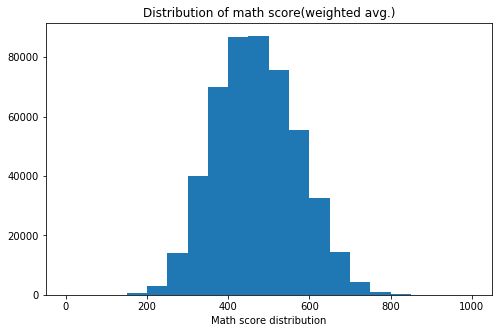

In [16]:
#Lets look at the math score distrubution
#Looking at univariate distribution of main variable of interest: math score
binsize= 50
bins= np.arange(0, math_score['math_score'].max() + 100, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = math_score, x = 'math_score', bins = bins)
plt.title("Distribution of math score(weighted avg.)")
plt.xlabel('Math score distribution')
plt.show()

In [17]:
#First convert gender to a category
df_student['gender']= df_student['gender'].astype('category')

In [18]:
#First loop through each such column to make them categories per the levels ordered
level_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = level_order)

#Collect the col names who have same levels as in the level order above
cols =['matint_enjoys','matint_lookforward','motiv_forfuture','payattn_inclass','attschool_waste','attschool_prepcoll',
        'matanxious_worry','school_doeslittle']

for col in df_student[cols]:
    df_student[col] = df_student[col].astype(ordered_cat)

In [19]:
levels= ['Very much like me','Mostly like me','Somewhat like me','Not much like me','Not at all like me']
order_cat = pd.api.types.CategoricalDtype(ordered = True, categories = levels)

cols=['open_toprobsolve','perseve_exceedexp','perseve_giveup']

for col in df_student[cols]:
    df_student[col] = df_student[col].astype(order_cat)

## Compare mother and father job status
Proportion of working mothers is almost equal to that of the father's. Proportion of unemployed mothers is approximately 3% higher than that of the father's.  Retired moms are 25% and retired fathers are only 7% in this data set.

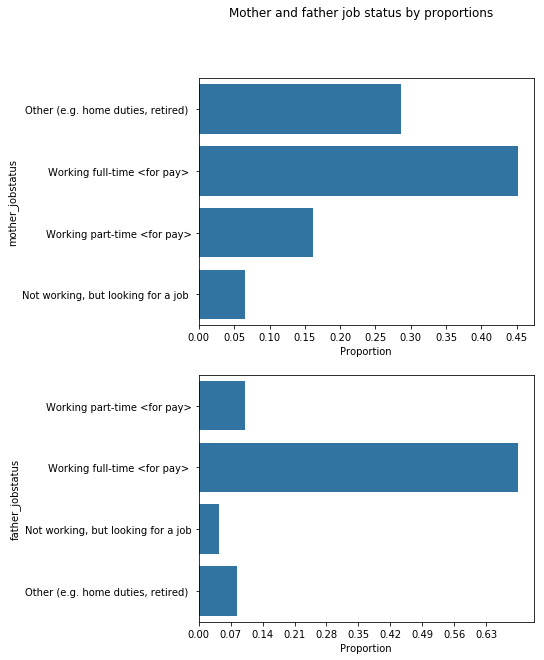

In [24]:
# get proportion taken by most common group for derivation
# of tick marks
n_points= df_student.shape[0]
max_count_mother = df_student['mother_jobstatus'].value_counts().max()
max_count_father = df_student['father_jobstatus'].value_counts().max()

max_prop_mother= max_count_mother/n_points
max_prop_father= max_count_father/n_points

#Print max_prop to get the scale stepsize

# generate tick mark locations and names
tick_props_mother = np.arange(0, max_prop_mother, 0.05)
tick_names_mother = ['{:0.2f}'.format(v) for v in tick_props_mother]

tick_props_father= np.arange(0, max_prop_father, 0.07)
tick_names_father= ['{:0.2f}'.format(v) for v in tick_props_father]

# create the plot
fig,ax= plt.subplots(nrows=2, figsize = [6, 10])

plt.suptitle("Mother and father job status by proportions")
base_color = sb.color_palette()[0]
sb.countplot(data = df_student, y= 'mother_jobstatus', color = base_color, ax=ax[0]);
ax[0].set_xticks(tick_props_mother * n_points)
ax[0].set_xticklabels(tick_names_mother)
ax[0].set_xlabel("Proportion")
#plt.xticks(tick_props_mother * n_points, tick_names_mother)

sb.countplot(data=df_student, y = 'father_jobstatus', color = base_color, ax=ax[1]);
#plt.xticks(tick_props_father * n_points , tick_names_father)
ax[1].set_xticks(tick_props_father * n_points)
ax[1].set_xticklabels(tick_names_father)
ax[1].set_xlabel("Proportion");

In [25]:
#Merge with df_student on country and student id with math_score for further analyses
student_score= pd.merge(df_student, math_score, on =['country', 'student_id'])

In [26]:
student_score['numclass_perweek']=pd.to_numeric(student_score['numclass_perweek'], errors ='coerce')

In [27]:
student_score['min_classperiod']=pd.to_numeric(student_score['min_classperiod'], errors= 'coerce')

In [28]:
#Fill in the NaN values with median of the number of classes 
student_score['math_perweek']= student_score['numclass_perweek'].fillna(4).astype('int64')


In [29]:
#Replace the Nan values in the class period with its median
student_score['duration']= student_score['min_classperiod'].fillna(50).astype('int64')

# Distribution of math classes per week and duration
Per week number of math classes in this dataset fall mostly between 4 and 5 periods. Although there are some values that are higher than 10 as well. The max value is 40. The duration of math class periods is between 45 to 55 minutes for the most. The curve is multimodal in places indicating a diverse range of values for the duration of math period in minutes. In the next slide we shall find out which countries those are where we see these extreme values.

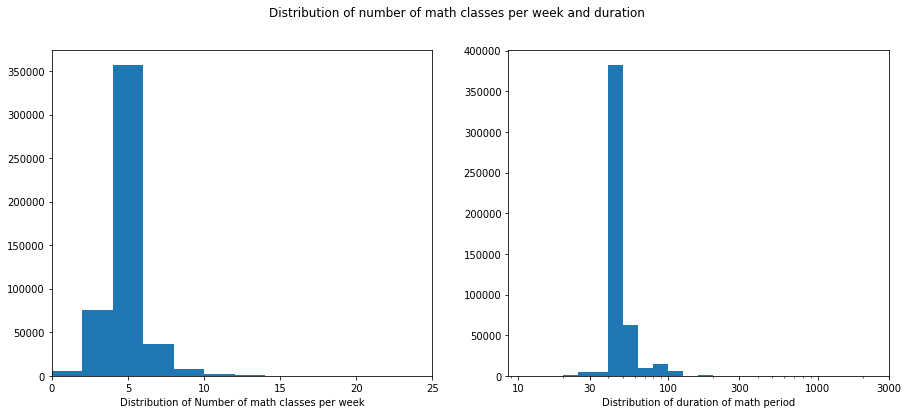

In [71]:
plt.figure(figsize=[15, 6])

#Plot the distribution of math classes per week
plt.subplot(1, 2, 1)
binsize= 2
bin_edges= np.arange(0, student_score['math_perweek'].max() +2 , binsize)
plt.hist(student_score['math_perweek'], bins = bin_edges);
plt.xlabel('Distribution of Number of math classes per week');
plt.xlim(0, 25);

#Plot the distribution of duration of math periods

plt.subplot(1,2,2)
#log_data=np.log10(student_copy['min_classperiod'])
#bins= 10
log_bin_edges2= 10 ** np.arange(1.0, np.log10(student_score['duration'].max()) +0.1, 0.1)
plt.xscale('log')
plt.hist(student_score['duration'], bins = log_bin_edges2);
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xlabel("Distribution of duration of math period");
plt.xticks(tick_locs, tick_locs);
plt.suptitle("Distribution of number of math classes per week and duration");

### Countries with math class duration longer than 100 minutes
The countries with longer duration of math classes are UK, USA(with few outliers), Jordan,Korea, Germany, Argentina and Norway.

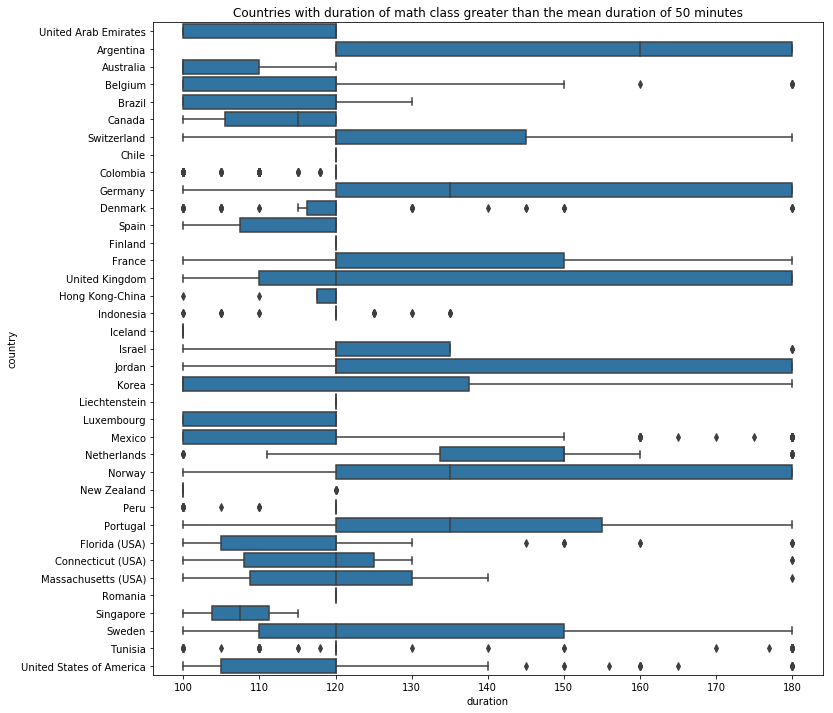

In [32]:
country_duration= student_score[student_score['duration'] >=100]


plt.figure(figsize=[12,12]);
plt.title("Countries with duration of math class greater than the mean duration of 50 minutes")
sb.boxplot(data = country_duration, x = 'duration', y = 'country', color = base_color);

# Countries showing high math scores
The high scoring countries are Singapore, China-Shanghai, Korea, Chinese-Taipei. For these the highest maximum score is at or above 775. Most outliers are seen for Singapore and China-Shanghai.

In [55]:
test_country= student_score.groupby(['country', 'student_id'])['math_score'].mean().reset_index(name='meanscore', level =0)

In [56]:
tc_1= test_country[test_country['meanscore'] >= 700]

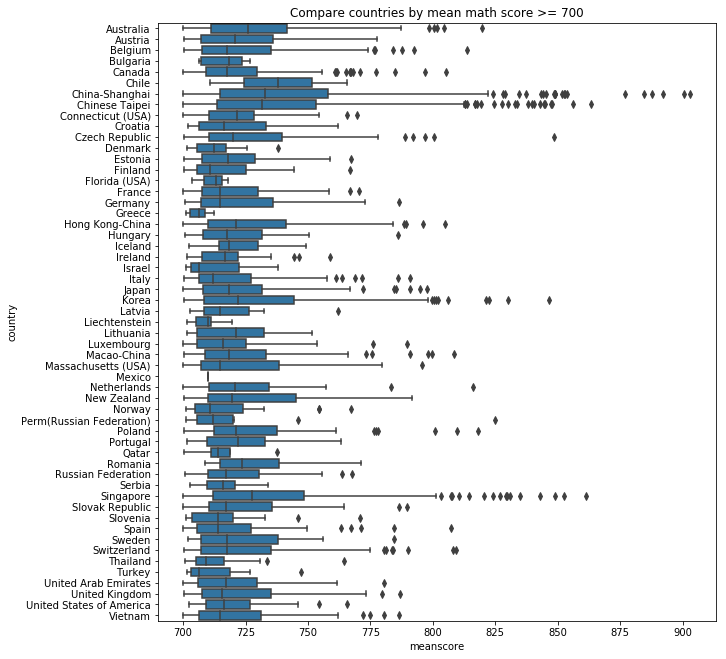

In [75]:
plt.figure(figsize=[10,11]);
plt.title("Compare countries by mean math score >= 700")
sb.boxplot(data= tc_1, x= 'meanscore', y ='country', color = base_color);

In [34]:
#Function for log transformation
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

# Math score vs. number of math classes per week
 We see that the math score increases as the number of classes per week increases but only upto 15 classes in general but decreases thereafter. I applied logarithmic transformation to the classes per week since its distribution was a bit skewed.


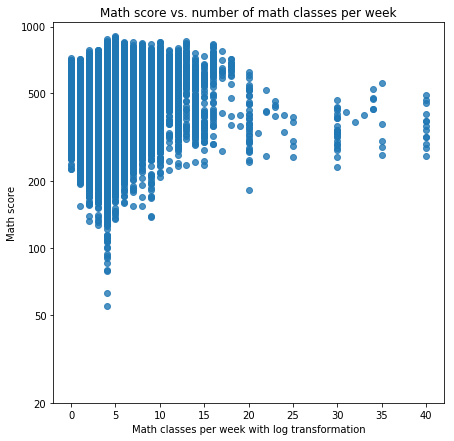

In [73]:
plt.figure(figsize=[7,7])

sb.regplot(student_score['math_perweek'], student_score['math_score'].apply(log_trans), fit_reg= False);
tick_locs = [20, 50, 100, 200, 500, 1000]
#x_ticks=[0, 3 , 10, 30, 300]
plt.yticks(log_trans(tick_locs), tick_locs);
plt.xlabel("Math classes per week with log transformation");
plt.ylabel("Math score");
plt.title("Math score vs. number of math classes per week");

# Math score vs. duration of classes

The duration of classes showed a weak negative correlation with the math score which means the optimum value for duration of a class if 50 where the score ranges from 300 to 600 in the heat map as the dark blue region and highest there above 800. After that the score does not increase for greater values of duration.

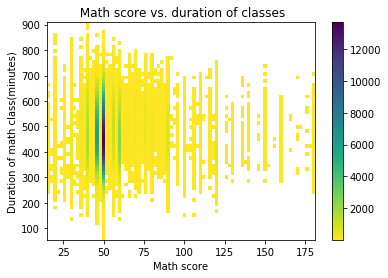

In [74]:
bins_x= np.arange(15, 180+ 2, 2)
bins_y = np.arange(54, 903 +15, 15)
plt.hist2d(data= student_score, x='duration', y='math_score', bins=[bins_x, bins_y], cmap= 'viridis_r',cmin = 0.5);
plt.colorbar()
plt.xlabel('Math score')
plt.ylabel("Duration of math class(minutes)")
plt.title(" Math score vs. duration of classes");

# Math performance based on teacher support and  Student behavior/attitude

The general trend appears to be that when teacher helps the students learn from their mistakes for most or every lesson and the student is open to problem solving, they score better grades and there are more such datapoints. Although there are data where the teacher hardly helps,students still got good grades but are not open to problem solving. These students must be smarter.

In [43]:
teacher_score =pd.merge(df_teacher, math_score, on =['country', 'student_id'])

In [44]:
#Merge teacher and student data
teacher_student= pd.merge(teacher_score, student_score, on=['country', 'student_id'])

np.random.seed(1978)
bsample= np.random.choice(teacher_student.shape[0], 1000, replace = False)
teacher_student_subset= teacher_student.loc[bsample]

In [45]:
teacher_student_subset['teacher_helps']= teacher_student_subset['teacher_helps'].astype('category')

In [46]:
#Group the data by country and teacher plus student attributes and then find the mean math score

t_student_1= teacher_student_subset.groupby(['country', 'student_id','help_learn_mist',
                                             'open_toprobsolve'])['math_score_y'].mean().reset_index(name='m_score',
                                                                                                          level = [2,3])                                                                                                                    
                                                                                                                                 


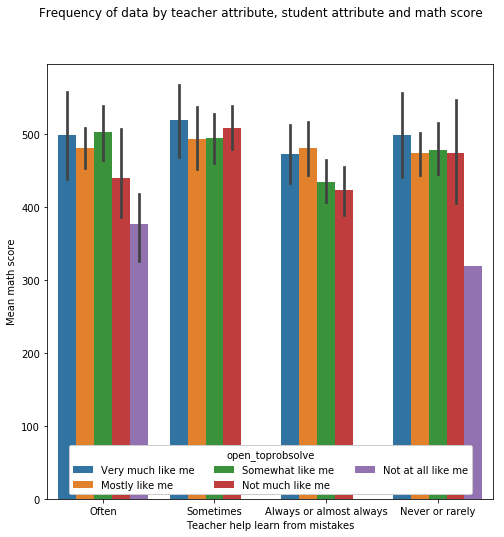

In [76]:
plt.figure(figsize=[8,8])
ax = sb.barplot(data = t_student_1, x = 'help_learn_mist', y = 'm_score', hue = 'open_toprobsolve')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'open_toprobsolve')
plt.xlabel('Teacher help learn from mistakes');
plt.ylabel('Mean math score');
plt.suptitle('Frequency of data by teacher attribute, student attribute and math score ');

# Math score based on teacher help and student math anxiety
We see that students who are math anxious they seem to score better with the teacher helping for most lessons and who are not anxious they may not score when teacher never or hardly helps.

In [48]:
t_student_4= teacher_student_subset.groupby(['country', 'student_id','matanxious_worry',
                                             'teacher_helps'])['math_score_y'].mean().reset_index(name='m_score',
                                                                                                          level = [2,3])                                                                                                                    
                                                                                                                                 


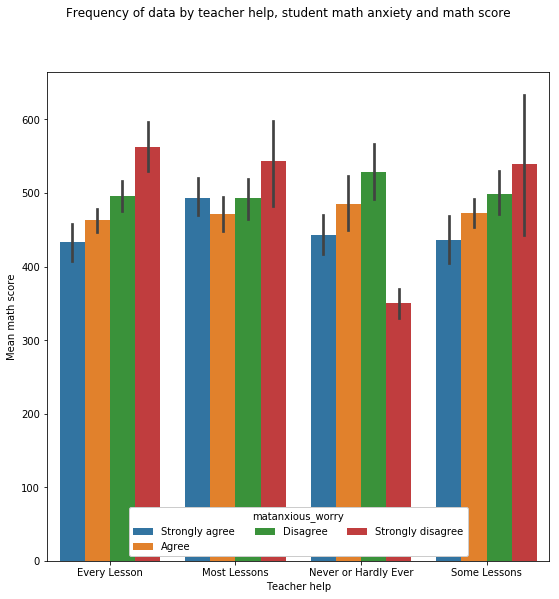

In [77]:
plt.figure(figsize=[9,9])
ax = sb.barplot(data = t_student_4, x = 'teacher_helps', y = 'm_score', hue = 'matanxious_worry')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'matanxious_worry')
plt.xlabel('Teacher help');
plt.ylabel('Mean math score');
plt.suptitle('Frequency of data by teacher help, student math anxiety and math score ');

# Math performance based on student perception of the material and internet access
Students who have access to internet but perceive that material is harder are scoring better scores than who do not have 
access to internet and perceive the material hard.

In [51]:
t_student_2= teacher_student_subset.groupby(['country', 'student_id','material_hard',
                                             'possess_internet'])['math_score_y'].mean().reset_index(name='m_score',
                                                                                                          level = [2,3])                                                                                                                    
                                                                                                                                 


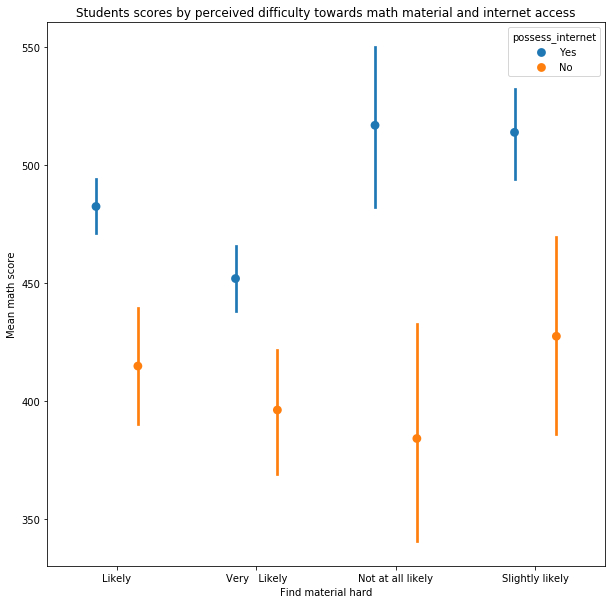

In [54]:
plt.figure(figsize=[10,10])
ax = sb.pointplot(data = t_student_2, x = 'material_hard', y = 'm_score', hue = 'possess_internet',
                  dodge = 0.3, linestyles = "");
plt.ylabel('Mean math score')
plt.xlabel('Find material hard');
plt.title('Students scores by perceived difficulty towards math material and internet access');

# Compare high scoring countries with low scorers based on possession of internet access to students
All the three high scoring countries, China-Shanghai, Australia and Korea show students having internet access score between 450 and 600, China-Shanghai with the maximum high score though it also shows data where students have no internet but still the median score is above 500.


Of the low scoring countries above more students in Indonesia don't have internet access  and Qatar had very small number of students with no internet access. In both cases, the median score is very low than when they do have internet access.
Iceland shows no data for no internet.

In [58]:
#Collect the features in a list to look at the difference

t_student_6 = teacher_student_subset[['country', 'student_id', 
                                              'motiv_forfuture',
                                              'school_doeslittle','mother_jobstatus','perseve_giveup',
                                             'extra_study', 'matint_enjoys','lesson_outside','min_classperiod',
                                             'ask_forexplains', 'encourage_think',
                                             'possess_internet', 'math_score_y']]


In [59]:
t6 = t_student_6.groupby(['country', 'student_id', 
                                              'mother_jobstatus',
                                              'possess_internet'])['math_score_y'].mean().reset_index(name='math')

In [60]:
#Look at some of the high scoring countries with these features
high_country= t6.query('country == "Australia" |country =="China-Shanghai" | country =="Korea"')

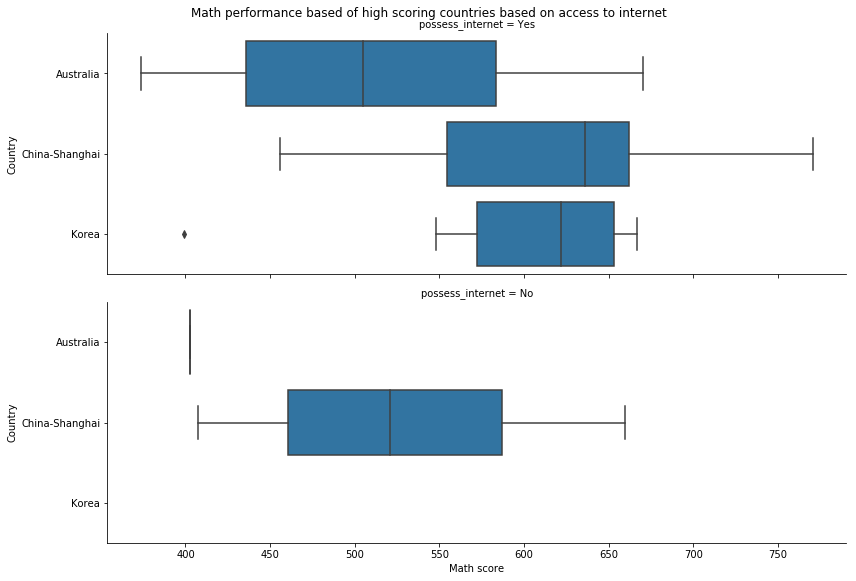

In [69]:
g = sb.factorplot(x="math", y="country", row="possess_internet",
                kind="box", orient="h",  aspect=3, size = 4, color = base_color,
                data= high_country);

g.set_axis_labels('Math score', 'Country');
plt.suptitle("Math performance based of high scoring countries based on access to internet", va= "bottom");

In [68]:
# Low scoring countries
low_country = t6.query('country == "Qatar" |country =="Indonesia" | country =="Iceland"')


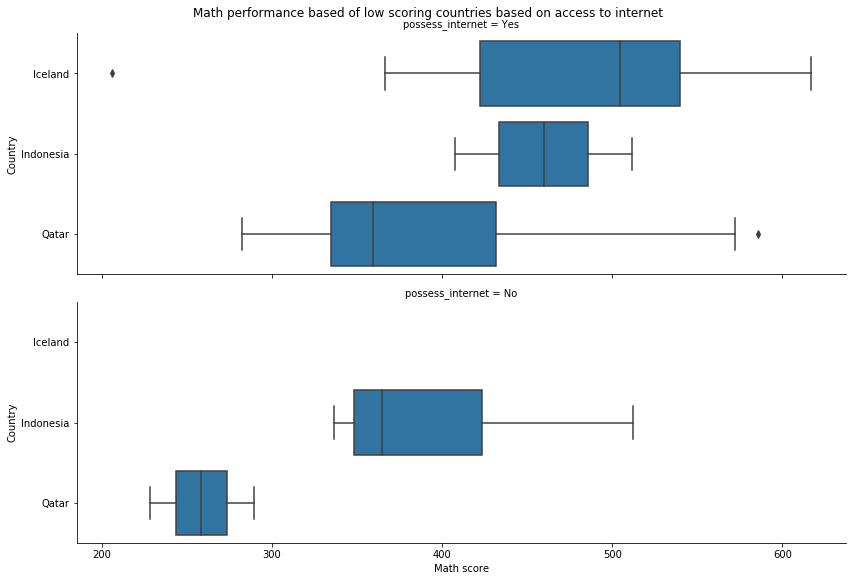

In [70]:
g = sb.factorplot(x="math", y="country", row="possess_internet",
                kind="box", orient="h",  aspect=3, size = 4, color = base_color,
                data= low_country);

g.set_axis_labels('Math score', 'Country');
plt.suptitle("Math performance based of low scoring countries based on access to internet", va= "bottom");